## Importing all the libraries

In [39]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings as war
war.filterwarnings('ignore')


### Downloading the dataset

In [40]:
!gdown 11LQILlalZGi_skLIipnpTyh-At77B_j6

Downloading...
From (uriginal): https://drive.google.com/uc?id=11LQILlalZGi_skLIipnpTyh-At77B_j6
From (redirected): https://drive.google.com/uc?id=11LQILlalZGi_skLIipnpTyh-At77B_j6&confirm=t&uuid=af953563-86c5-450a-ac66-d602238380e9
To: /Users/aryan/Documents/GitHub/Neutral-Networks/CNN/New_landmark_images.zip
100%|████████████████████████████████████████| 112M/112M [00:19<00:00, 5.88MB/s]


In [41]:
#!unzip New_landmark_images.zip

In [42]:
import os

In [43]:
os.getcwd()

'/Users/aryan/Documents/GitHub/Neutral-Networks/CNN'

In [50]:
train_data = tf.keras.utils.image_dataset_from_directory('New_landmark_images/train/', shuffle=True, seed=123, image_size=(224,224), batch_size= 32)
test_data = tf.keras.utils.image_dataset_from_directory('New_landmark_images/test/', shuffle=True, seed=123, image_size=(224,224), batch_size= 32)
val_data = tf.keras.utils.image_dataset_from_directory('New_landmark_images/validation/', shuffle=True, seed=123, image_size=(224,224), batch_size= 32)

Found 737 files belonging to 10 classes.
Found 43 files belonging to 10 classes.
Found 155 files belonging to 10 classes.


In [51]:
from tensorflow.keras import layers

data_preprocess = tf.keras.Sequential(
    name = 'data_preprocess',
    layers = [layers.Rescaling(1.0/255)]
)


# Performing the data pre-process on the data for all 3 sets (train, test, validation)
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))

In [52]:
## Print of all the class names
for items in train_data.class_names:
    print(items)

01.Niagara_Falls
02.Golden_Gate_Bridge
03.Kantanagar_Temple
04.Eiffel_Tower
05.Washington_Monument
06.Hanging_Temple
07.Forth_Bridge
08.Gateway_of_India
09.Machu_Picchu
10.Great_Wall_of_China


## Creating a VGG 16 Model from Scratch

In [53]:
vgg16_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    # tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding= 'same', activation= 'relu'),
    # tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding= 'same', activation= 'relu'),
    # tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

    # tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',activation= 'relu'),
    # tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',activation= 'relu'),
    # tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',activation= 'relu'),
    # #tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
    # #                activation= 'relu'),
    # tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

    # tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',activation= 'relu'),
    # tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',activation= 'relu'),
    # tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',activation= 'relu'),
    # #tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',
    # #                activation= 'relu'),
    # tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

    # tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',activation= 'relu'),
    # tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',activation= 'relu'),
    # tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',activation= 'relu'),
    # #tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
    # #                activation= 'relu'),
    # tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
]) 

In [54]:
vgg16_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_37 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 802816)            0         
                                                                 
 dense_3 (Dense)             (None, 10)                8028170   
                                                                 
Total params: 8,066,890
Trainable params: 8,066,890
Non-trainable params: 0
____________________________________________

In [55]:
import functools
from tensorflow.keras.optimizers import Adam, SGD

top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())

opt = SGD(learning_rate = 0.005, momentum = 0.99)

vgg16_model.compile(
    optimizer = opt,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

print(vgg16_model.optimizer.get_config())

history = vgg16_model.fit(train_ds,
                          epochs=5,
                          validation_data = val_ds
                          )

{'name': 'SGD', 'learning_rate': 0.005, 'decay': 0.0, 'momentum': 0.99, 'nesterov': False}
Epoch 1/5
24/24 [==============================] - 7s 225ms/step - loss: 2.6370 - accuracy: 0.1398 - val_loss: 2.2919 - val_accuracy: 0.1161
Epoch 2/5
24/24 [==============================] - 4s 157ms/step - loss: 2.3332 - accuracy: 0.1099 - val_loss: 2.3036 - val_accuracy: 0.0968
Epoch 3/5
24/24 [==============================] - 4s 148ms/step - loss: 2.2990 - accuracy: 0.1208 - val_loss: 2.3119 - val_accuracy: 0.1226
Epoch 4/5
24/24 [==============================] - 4s 148ms/step - loss: 2.3061 - accuracy: 0.1289 - val_loss: 2.3176 - val_accuracy: 0.0968
Epoch 5/5
24/24 [==============================] - 4s 147ms/step - loss: 2.2952 - accuracy: 0.1180 - val_loss: 2.3213 - val_accuracy: 0.0968


In [56]:
# Saving the Model
vgg16_model.save("vgg16_model_scratch.h5")

In [58]:
# Loading the model
vgg16_model_scratch = tf.keras.models.load_model("vgg16_model_scratch.h5")

In [59]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

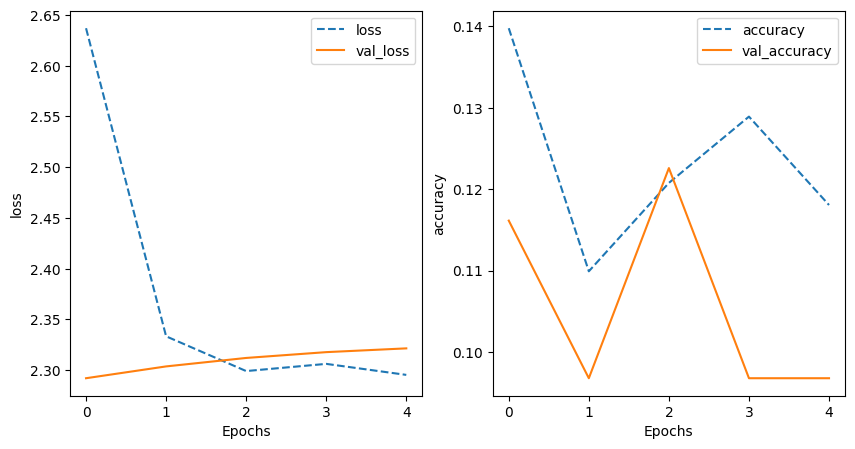

In [60]:
training_plot(['loss', 'accuracy'], history)

In [61]:
# Evaluate the model
loss, acc = vgg16_model_scratch.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

2/2 - 0s - loss: 2.3197 - accuracy: 0.0930 - 197ms/epoch - 98ms/step
Restored model, accuracy:  9.30%


## Lets use a pretrained model: VGG16

In [64]:
pretrained_model = tf.keras.applications.VGG16(weights = 'imagenet', include_top=False, input_shape=[224,224,3])

pretrained_model.trainable = False

vgg16_model = tf.keras.Sequential(
    name = 'vgg16_model',
    layers = [
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

In [65]:
vgg16_model.summary()

Model: "vgg16_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 10)                250890    
                                                                 
Total params: 14,965,578
Trainable params: 250,890
Non-trainable params: 14,714,688
_________________________________________________________________


In [66]:
import functools
top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())

vgg16_model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [67]:
history = vgg16_model.fit(train_ds, epochs=5,
                    validation_data=val_ds)

Epoch 1/5
24/24 [==============================] - 6s 226ms/step - loss: 1.6643 - accuracy: 0.5088 - val_loss: 0.6738 - val_accuracy: 0.7613
Epoch 2/5
24/24 [==============================] - 5s 215ms/step - loss: 0.4899 - accuracy: 0.8467 - val_loss: 0.4362 - val_accuracy: 0.8581
Epoch 3/5
24/24 [==============================] - 5s 215ms/step - loss: 0.1502 - accuracy: 0.9607 - val_loss: 0.4762 - val_accuracy: 0.8581
Epoch 4/5
24/24 [==============================] - 5s 215ms/step - loss: 0.0885 - accuracy: 0.9824 - val_loss: 0.4189 - val_accuracy: 0.8774
Epoch 5/5
24/24 [==============================] - 5s 217ms/step - loss: 0.0686 - accuracy: 0.9946 - val_loss: 0.3982 - val_accuracy: 0.8645


In [68]:
# Saving the Model
vgg16_model_pretrained = vgg16_model.save("vgg16_model_pretrained.h5")

In [69]:
#Loading the model
vgg16_model_pretrained = tf.keras.models.load_model("vgg16_model_pretrained.h5")

In [70]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

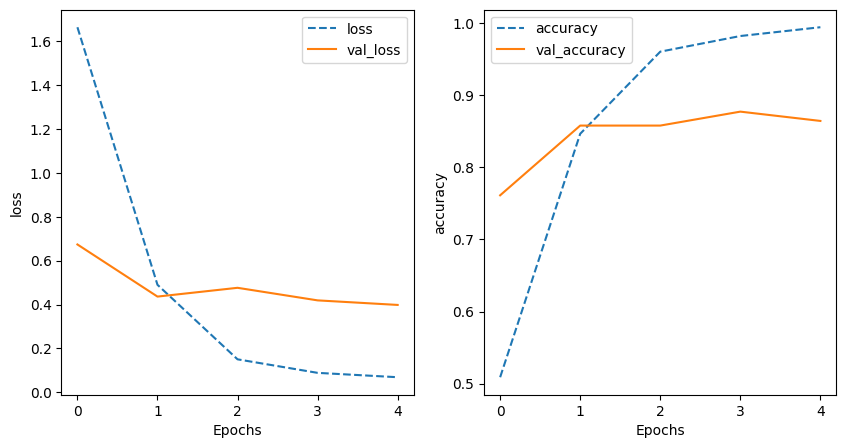

In [71]:
training_plot(['loss', 'accuracy'], history)

In [72]:
# Evaluate the model
loss, acc = vgg16_model_pretrained.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

2/2 - 0s - loss: 0.5518 - accuracy: 0.8605 - 493ms/epoch - 246ms/step
Restored model, accuracy: 86.05%


## Evaluate result: 

In [73]:
def plot_image(pred_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)


In [75]:
import random

2/2 [==============================] - 0s 203ms/step


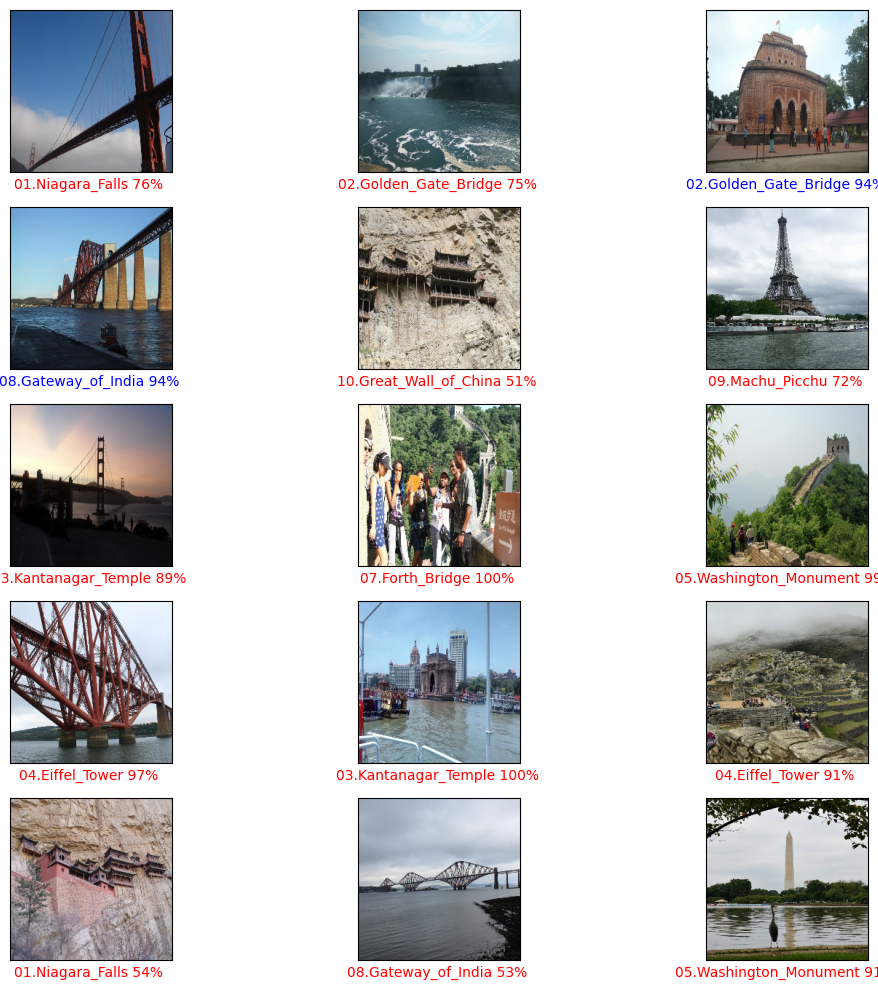

In [76]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = vgg16_model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()